# Exploratory Data Analysis

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy.stats import binom

In [4]:
df=pd.read_csv('Cricket.csv')

# Data Cleaning

## Replacing unknown values with mean

In [5]:
existing_values = df["Won_By"].loc[df["Won_By"] != '?']
existing_values_mean = existing_values.astype(str).astype(int).mean()
df["Won_By"]=df["Won_By"].replace("?",existing_values_mean).astype(int)
df["Won_By"].head()

0    140
1     33
2      9
3      5
4      5
Name: Won_By, dtype: int32

## Handling outliers

In [6]:
for index,obj in enumerate(df['Won_By']):
    if obj <=(df["Won_By"].mean()-3*df["Won_By"].std()) or  obj >=(df["Won_By"].mean()+3*df["Won_By"].std()) :
        df['Won_By'][index]=df["Won_By"].mean()


C:\Users\Nitesh\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


## Replacing unknown categorical data with its previous value

In [12]:
for index,obj in enumerate(df["Venue_Name"]):
    if obj == '?':
        df['Venue_Name'][index] = df['Venue_Name'][index-1]


In [32]:
for index,obj in enumerate(df["City_Name"]):
    if obj == '?':
        df['City_Name'][index] = df['City_Name'][index-1]


# Data Normalisation

In [14]:
mean=np.mean(df['Won_By'])
std =np.std(df['Won_By'])
df['normalized_won_by']=[np.abs((obj-mean)/(df['Won_By'].max()-df['Won_By'].min())) for  obj in df['Won_By']]
#df['normalized_won_by_2']=[np.abs((obj-mean)/std) for  obj in df['Won_By']]

# Data Visualisation

## Adding new columns to data frame for Data visualisation

In [8]:
cn={1:'KKR',2:'RCB',3:'CSK',4:'KXIP',5:'RR',6:'DD',7:'MI',8:'DC',9:'KTK',10:'PWI',11:'SRH',12:'RPS',13:'GL'}
# for index,obj in enumerate(df['Team_Name_Id']):
#     df['Team_Name'][index]=cn[obj]
    

df['Home_team']=[cn[obj] for index,obj in enumerate(df['Team_Name_Id'])]
df['Opponent_team']=[cn[obj] for index,obj in enumerate(df['Opponent_Team_Id'])]
df['Toss_Winner']=[cn[obj] for index,obj in enumerate(df['Toss_Winner_Id'])]
df['Match_Winner']=[cn[obj] for index,obj in enumerate(df['Match_Winner_Id'])]
       


    

In [15]:
df.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Venue_Name,Toss_Winner_Id,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,normalized_won_by,Home_team,Opponent_team,Toss_Winner,Match_Winner,normalized_won_by_1,normalized_won_by_2
0,335987,18-Apr-08,2,1,M Chinnaswamy Stadium,2,17,1,2,470,477,Bangalore,0.043210,RCB,KKR,RCB,KKR,0.043210,0.246042
1,335988,19-Apr-08,4,3,"Punjab Cricket Association Stadium, Mohali",3,33,3,19,471,487,Chandigarh,0.259427,KXIP,CSK,CSK,CSK,0.259427,1.477187
2,335989,19-Apr-08,6,5,Feroz Shah Kotla,5,9,6,90,472,512,Delhi,0.064898,DD,RR,RR,DD,0.064898,0.369530
3,335990,20-Apr-08,7,2,Wankhede Stadium,7,5,2,11,473,476,Mumbai,0.118952,MI,RCB,MI,RCB,0.118952,0.677316
4,335991,20-Apr-08,1,8,Eden Gardens,8,5,1,4,474,486,Kolkata,0.118952,KKR,DC,DC,KKR,0.118952,0.677316


Text(0.5,0,'Team name')

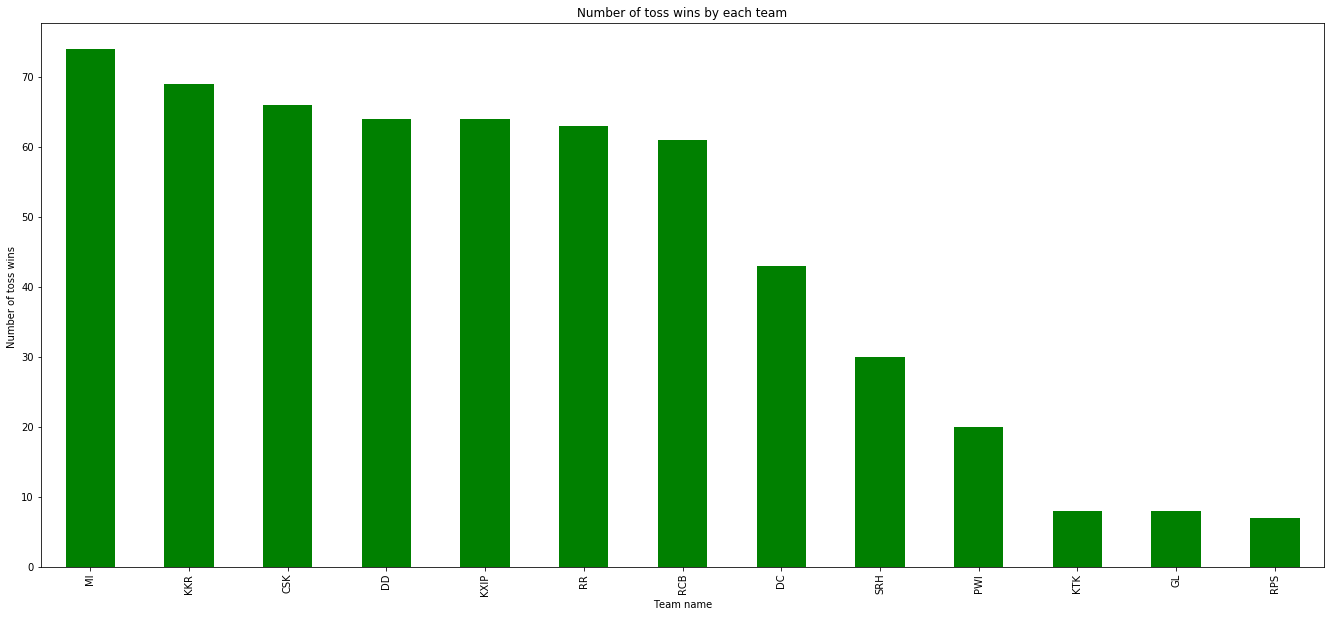

In [35]:
df['Toss_Winner'].value_counts().plot(kind='bar',color='green')
plt.title("Number of toss wins by each team")
plt.ylabel('Number of toss wins ')
plt.xlabel('Team name')

Text(0.5,0,'Team name')

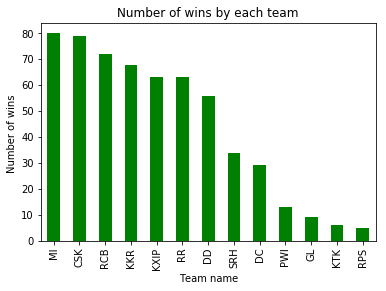

In [17]:
df['Match_Winner'].value_counts().plot(kind='bar',color='green')
plt.title("Number of wins by each team")
plt.ylabel('Number of wins ')
plt.xlabel('Team name')

Text(0.5,0,'Umpire ID')

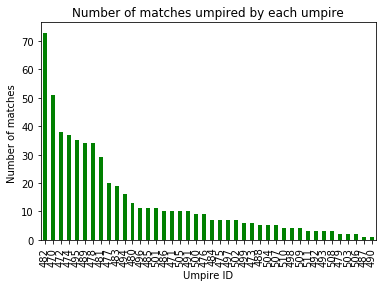

In [95]:
df['First_Umpire_Id'].value_counts().plot(kind='bar',color='green')
plt.title("Number of matches umpired by each umpire")
plt.ylabel('Number of matches ')
plt.xlabel('Umpire ID')

Text(0.5,0,'Umpire ID')

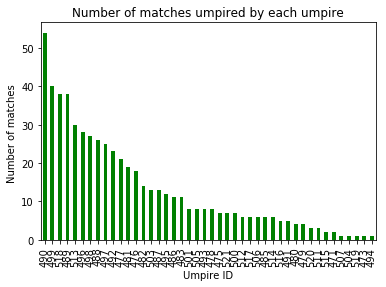

In [96]:
df['Second_Umpire_Id'].value_counts().plot(kind='bar',color='green')
plt.title("Number of matches umpired by each umpire")
plt.ylabel('Number of matches ')
plt.xlabel('Umpire ID')

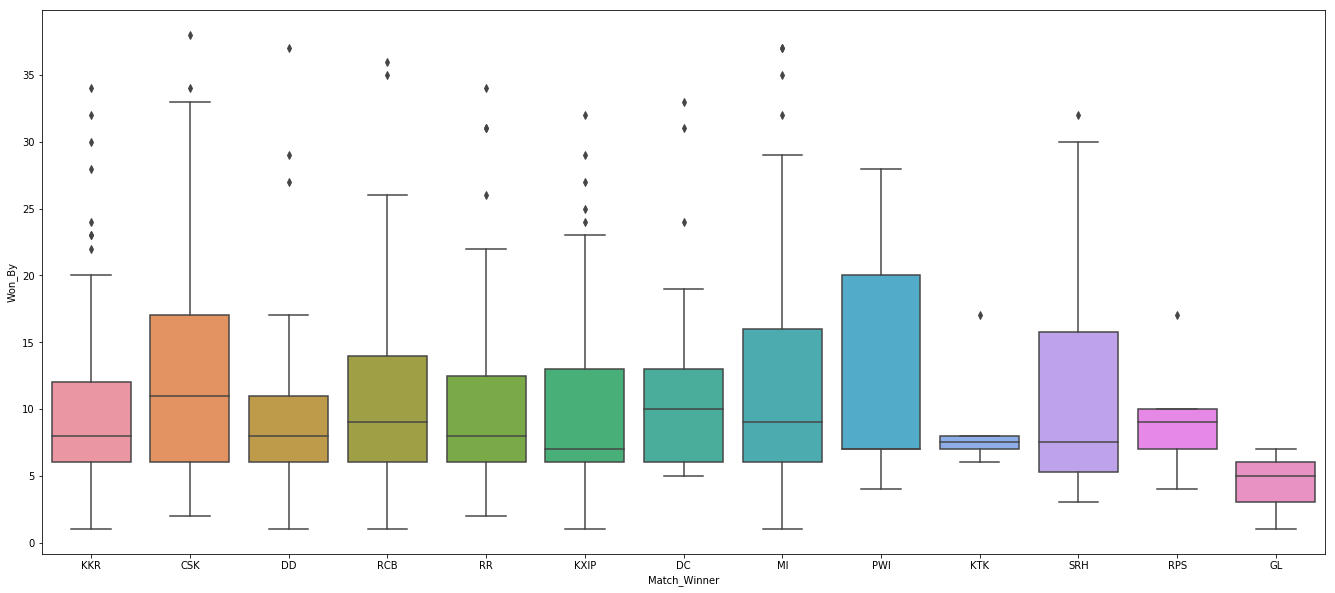

In [36]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="Match_Winner", y="Won_By", data=df)

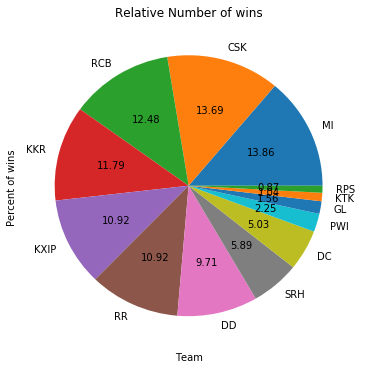

In [19]:
df['Match_Winner'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Relative Number of wins")
plt.ylabel('Percent of wins ')
plt.xlabel('Team');

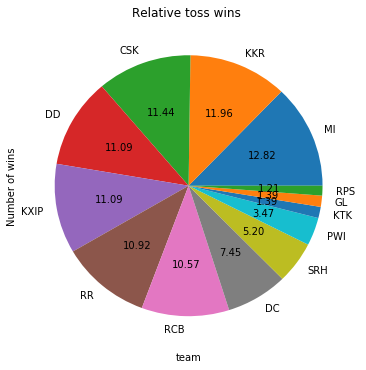

In [20]:
df['Toss_Winner'].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Relative toss wins ")
plt.ylabel('Number of wins')
plt.xlabel('team');

In [21]:
df.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Venue_Name,Toss_Winner_Id,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Home_team,Opponent_team,Toss_Winner,Match_Winner,0
0,335987,18-Apr-08,2,1,M Chinnaswamy Stadium,2,17,1,2,470,477,Bangalore,RCB,KKR,RCB,KKR,Opponent-team
1,335988,19-Apr-08,4,3,"Punjab Cricket Association Stadium, Mohali",3,33,3,19,471,487,Chandigarh,KXIP,CSK,CSK,CSK,Opponent-team
2,335989,19-Apr-08,6,5,Feroz Shah Kotla,5,9,6,90,472,512,Delhi,DD,RR,RR,DD,Home-team
3,335990,20-Apr-08,7,2,Wankhede Stadium,7,5,2,11,473,476,Mumbai,MI,RCB,MI,RCB,Opponent-team
4,335991,20-Apr-08,1,8,Eden Gardens,8,5,1,4,474,486,Kolkata,KKR,DC,DC,KKR,Home-team


In [23]:
df.head()

,Match_Id,Match_Date,Team_Name_Id,Opponent_Team_Id,Venue_Name,Toss_Winner_Id,Won_By,Match_Winner_Id,Man_Of_The_Match_Id,First_Umpire_Id,Second_Umpire_Id,City_Name,Home_team,Opponent_team,Toss_Winner,Match_Winner,0
0,335987,18-Apr-08,2,1,M Chinnaswamy Stadium,2,17,1,2,470,477,Bangalore,RCB,KKR,RCB,KKR,Opponent-team
1,335988,19-Apr-08,4,3,"Punjab Cricket Association Stadium, Mohali",3,33,3,19,471,487,Chandigarh,KXIP,CSK,CSK,CSK,Opponent-team
2,335989,19-Apr-08,6,5,Feroz Shah Kotla,5,9,6,90,472,512,Delhi,DD,RR,RR,DD,Home-team
3,335990,20-Apr-08,7,2,Wankhede Stadium,7,5,2,11,473,476,Mumbai,MI,RCB,MI,RCB,Opponent-team
4,335991,20-Apr-08,1,8,Eden Gardens,8,5,1,4,474,486,Kolkata,KKR,DC,DC,KKR,Home-team


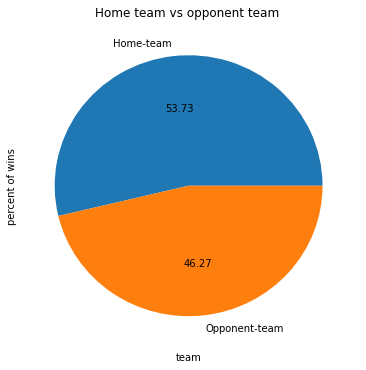

In [24]:
df[0].value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title("Home team vs opponent team ")
plt.ylabel('percent of wins')
plt.xlabel('team');

In [25]:
#number of matches whose match winner is also toss winner 

ss = df['Toss_Winner'] == df['Match_Winner']
ss.groupby(ss).size()

False    285
True     292
dtype: int64

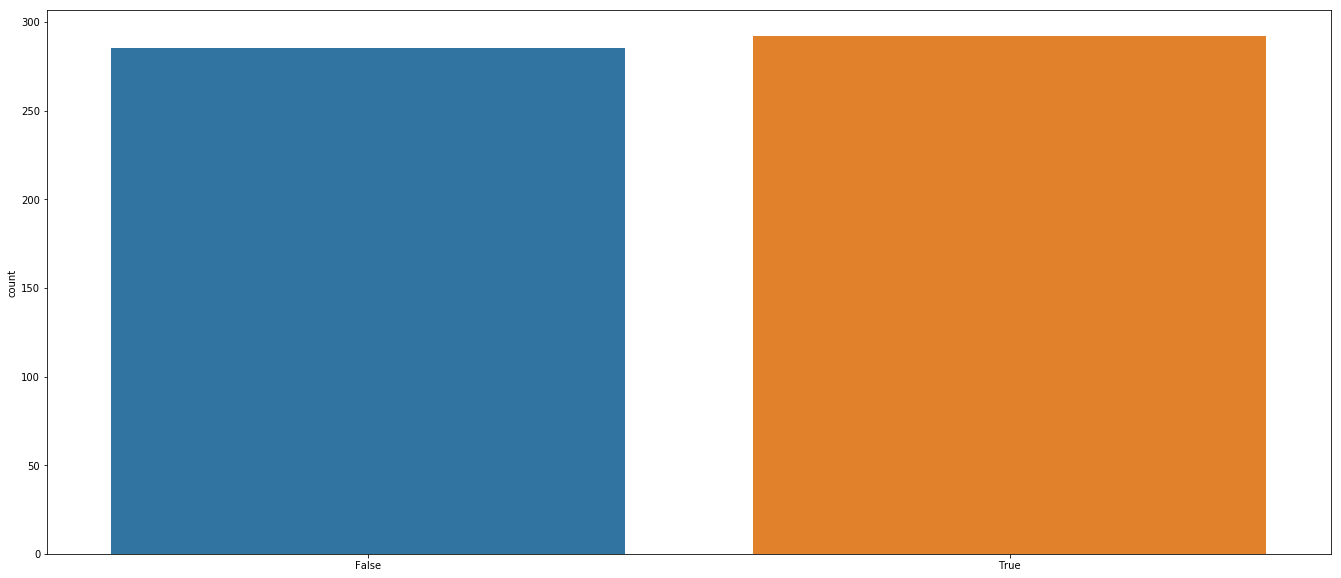

In [26]:
sns.countplot(ss)

In [27]:
#number of matches whose match winner is also toss winner and is the team winner


ss = df['Toss_Winner'] == df['Match_Winner'] 
ss1 =df['Home_team'] == df['Match_Winner']
ss2 = ss == ss1
ss2.groupby(ss2).size()

False    304
True     273
dtype: int64

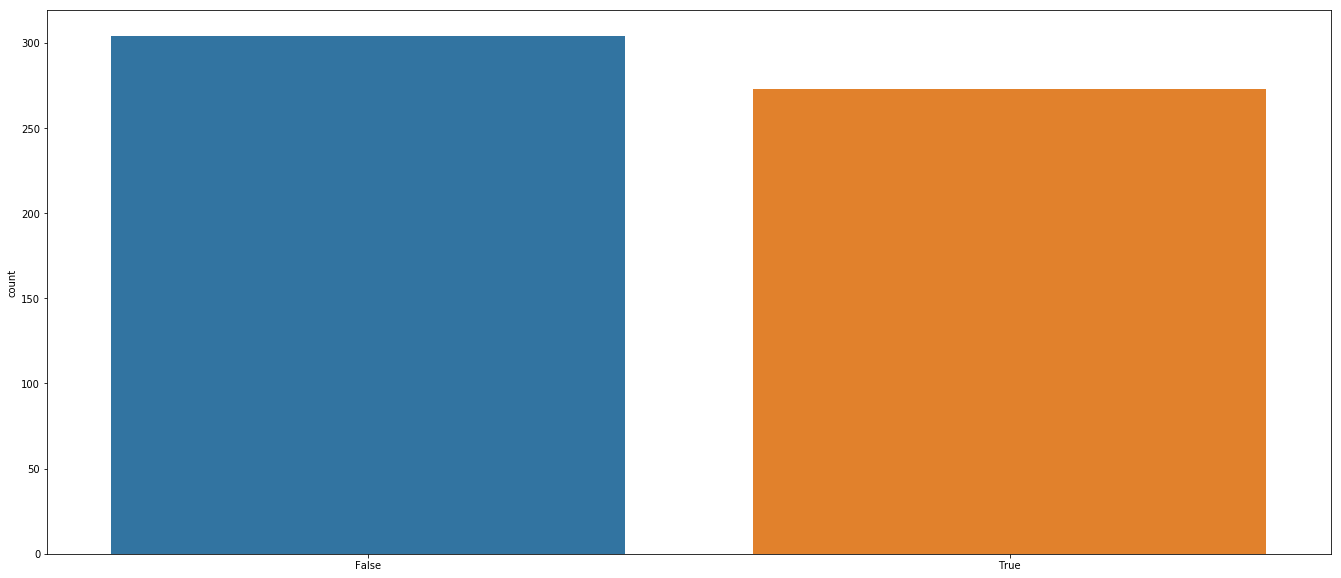

In [28]:
sns.countplot(ss2)

Text(0,0.5,'percent of wins')

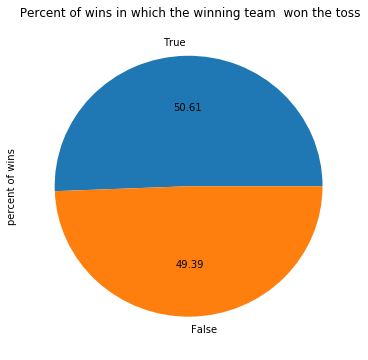

In [29]:
#toss and match
ss.value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title(" Percent of wins in which the winning team  won the toss")
plt.ylabel('percent of wins')

Text(0,0.5,'percent of wins')

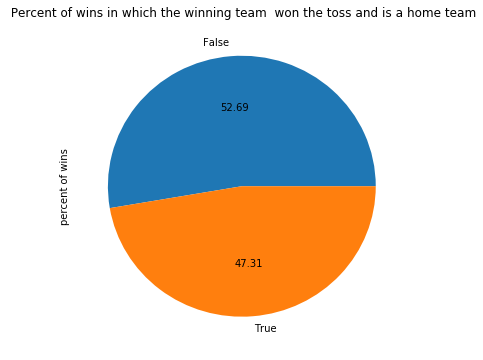

In [98]:
#toss match home
ss2.value_counts().plot.pie(figsize=(6, 6), autopct='%.2f')
plt.title(" Percent of wins in which the winning team  won the toss and is a home team")
plt.ylabel('percent of wins')


# Hypothesis testing

In [105]:
#hypothesis testing 
#let p be the probability that a team wins if it wins the toss
#from the piechart we come to know that p= 0.506
# H0 :p = 0.506
#H1 :p! = 0.506
#let n be the number of trials
#then the mean will be np 
n= len(df['Match_Winner'])
p=0.506
mean = n*p
x= 280 # no of instances the team wins if wins the toss 
#X ~ Binom(n= 577 ,p=0.506)
p_value=binom.cdf(x,n,p)
# p_value = 0.17
#since p_value > 0.05 we cannot reject H0 
#So there is 0.5 possibility that a team will win if it wins the toss

0.16993815578297905